# Hoja de trabajo 7
Jose Daniel Gomez Cabrera 21429

In [196]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn import set_config
import time

%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')

1. Use los mismos conjuntos de entrenamiento y prueba de las hojas de trabajo pasadas para probar el algoritmo.

In [197]:
houses = pd.read_csv('train.csv')
houses.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


2. Explore los datos y explique las transformaciones que debe hacerle para generar un model de máquinas vectoriales de soporte.

In [198]:
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(houses.drop(['Id', 'SalePrice'], axis=1))
categorical_columns = categorical_columns_selector(houses)

print(numerical_columns)
print(categorical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCon

In [199]:
houses[categorical_columns].describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


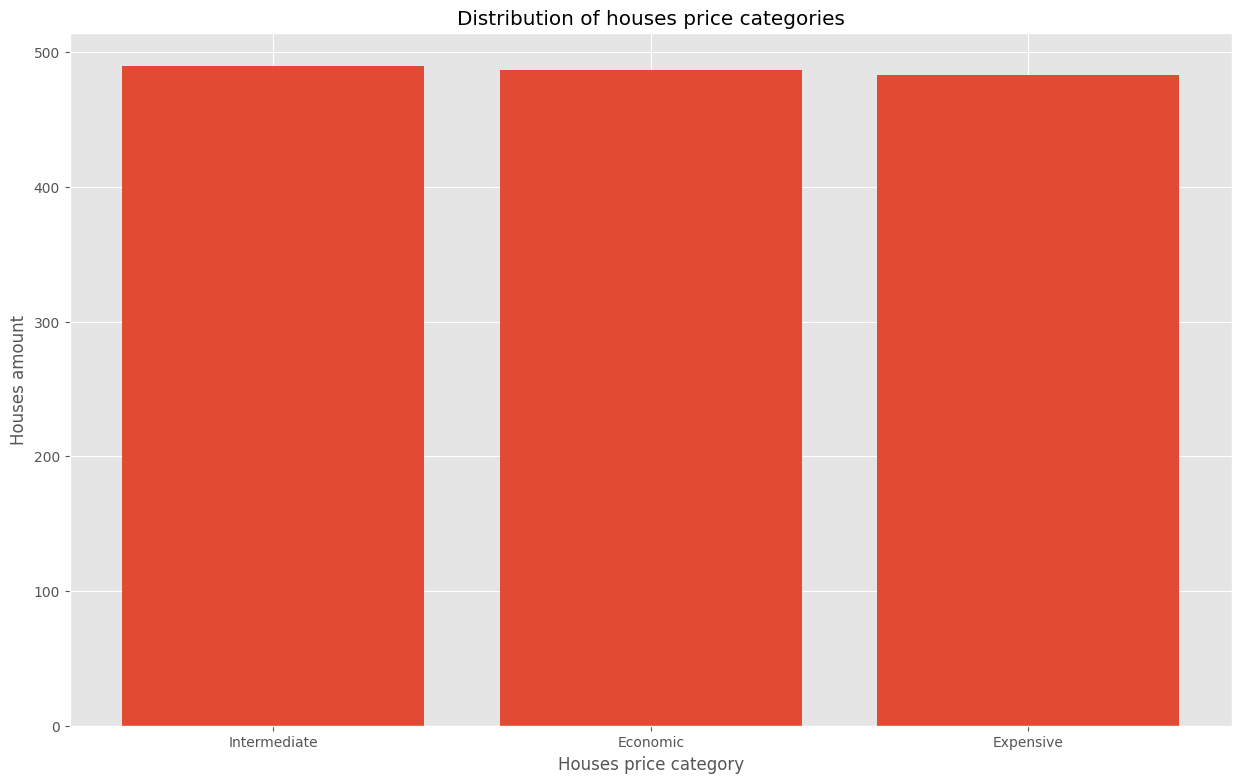

In [200]:
# Define categories
categories = ['Economic', 'Intermediate', 'Expensive']

# Create a new column in the DataFrame for the categories
houses['PriceCategory'] = pd.qcut(houses['SalePrice'], q=len(categories), labels=categories)

# Verificar la distribución de las categorías
plt.bar(houses['PriceCategory'].value_counts().index, houses['PriceCategory'].value_counts().values)
plt.xlabel('Houses price category')
plt.ylabel('Houses amount')
plt.title('Distribution of houses price categories')
plt.show()

In [201]:
houses['PriceCategory'].value_counts()

Intermediate    490
Economic        487
Expensive       483
Name: PriceCategory, dtype: int64

3. Use como variable respuesta la variable categórica que especifica si la casa es barata, media o cara

In [202]:
target = houses.pop('PriceCategory')
data = houses.drop(['Id', 'SalePrice'], axis=1)

random.seed(123)
data_train, data_test,target_train, target_test = train_test_split(data, target,test_size=0.3,train_size=0.7)

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numeric_preprocessor = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)
preprocesador = ColumnTransformer([
    ('one_hot_encoder',categorical_preprocessor,categorical_columns),
    ('numeric', numeric_preprocessor, numerical_columns)
],remainder="passthrough")

model = make_pipeline(preprocesador, SVC(kernel="linear"))

set_config(display='diagram')
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exteri...
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('svc', SVC(kernel='linear'))])

In [203]:
_=model.fit(data_train,target_train)
model.score(data_test,target_test)

0.7853881278538812

In [204]:
target_pred = model.predict(data_test)
print ("Accuracy:",metrics.accuracy_score(target_test, target_pred))
print ("Precision:", metrics.precision_score(target_test,target_pred,average='weighted') )
print ("Recall: ", metrics.recall_score(target_test,target_pred,average='weighted'))

Accuracy: 0.7853881278538812
Precision: 0.7894172742169839
Recall:  0.7853881278538812


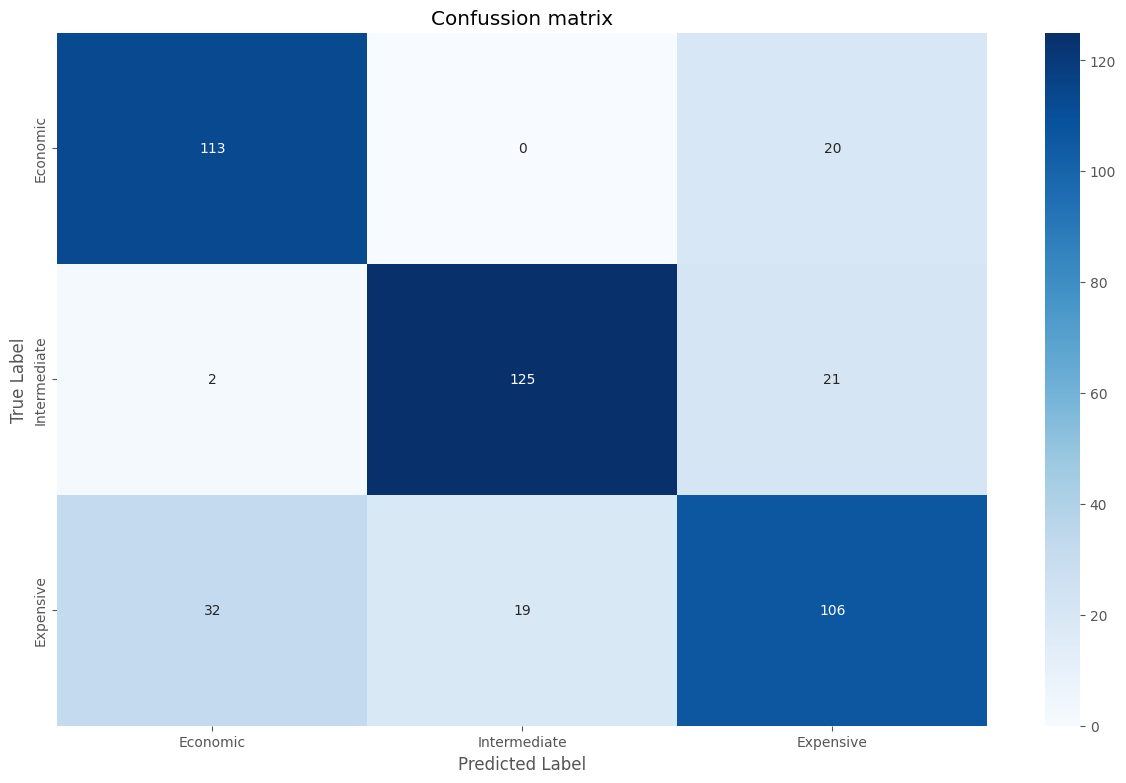

In [205]:
confMatrix = confusion_matrix(target_pred, target_test)
sb.heatmap(
  confMatrix,
  annot=True,
  cmap="Blues",
  fmt="d",
  xticklabels=['Economic', 'Intermediate', 'Expensive'],
  yticklabels=['Economic', 'Intermediate', 'Expensive']
)
plt.title('Confussion matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

4. Genere varios (más de 2) modelos de SVM con diferentes kernels y distintos valores en los parámetros c, gamma (circular) y d (en caso de que utilice el polinomial). Puede tunear el modelo de forma automática siempre que explique los resultados

In [206]:
model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'svc', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__verbose_feature_names_out', 'columntransformer__one_hot_encoder', 'columntransformer__numeric', 'columntransformer__one_hot_encoder__categories', 'columntransformer__one_hot_encoder__drop', 'columntransformer__one_hot_encoder__dtype', 'columntransformer__one_hot_encoder__feature_name_combiner', 'columntransformer__one_hot_encoder__handle_unknown', 'columntransformer__one_hot_encoder__max_categories', 'columntransformer__one_hot_encoder__min_frequency', 'columntransformer__one_hot_encoder__sparse_output', 'columntransformer__numeric__memory', 'columntransformer__numeric__steps', 'columntransformer__numeric__verbose', 'columntransformer__numeric__imputer', 'columntransformer__numeric__scaler', 'co

##### Model 1

In [207]:
initTime = time.time()

modelo = make_pipeline(preprocesador, SVC(kernel="poly"))
_=modelo.fit(data_train,target_train)
param_grid = {
  'svc__C': (0.01, 0.1, 1, 5,16,32),
  'svc__degree':(2,3,5,7)
}
model_grid_search = GridSearchCV(modelo, param_grid=param_grid, n_jobs=2, cv=10)
model_grid_search.fit(data_train, target_train)
accuracy = model_grid_search.score(data_test, target_test)
accuracy_train = model_grid_search.score(data_train, target_train)
target_pred_train = model_grid_search.predict(data_train)
target_pred = model_grid_search.predict(data_test)

endTime = time.time()
execTime = round(endTime - initTime, 3)

5. Use los modelos para predecir el valor de la variable respuesta

In [208]:
print("---- Model 1 ----")
print("Accuracy Train: ",accuracy_train)
print("Accuracy: ",accuracy)
print(f"Execution time: {execTime}s")
model_grid_search.best_params_

---- Model 1 ----
Accuracy Train:  0.9764936336924583
Accuracy:  0.8310502283105022
Execution time: 23.634s


{'svc__C': 5, 'svc__degree': 2}

6. Haga las matrices de confusión respectivas.

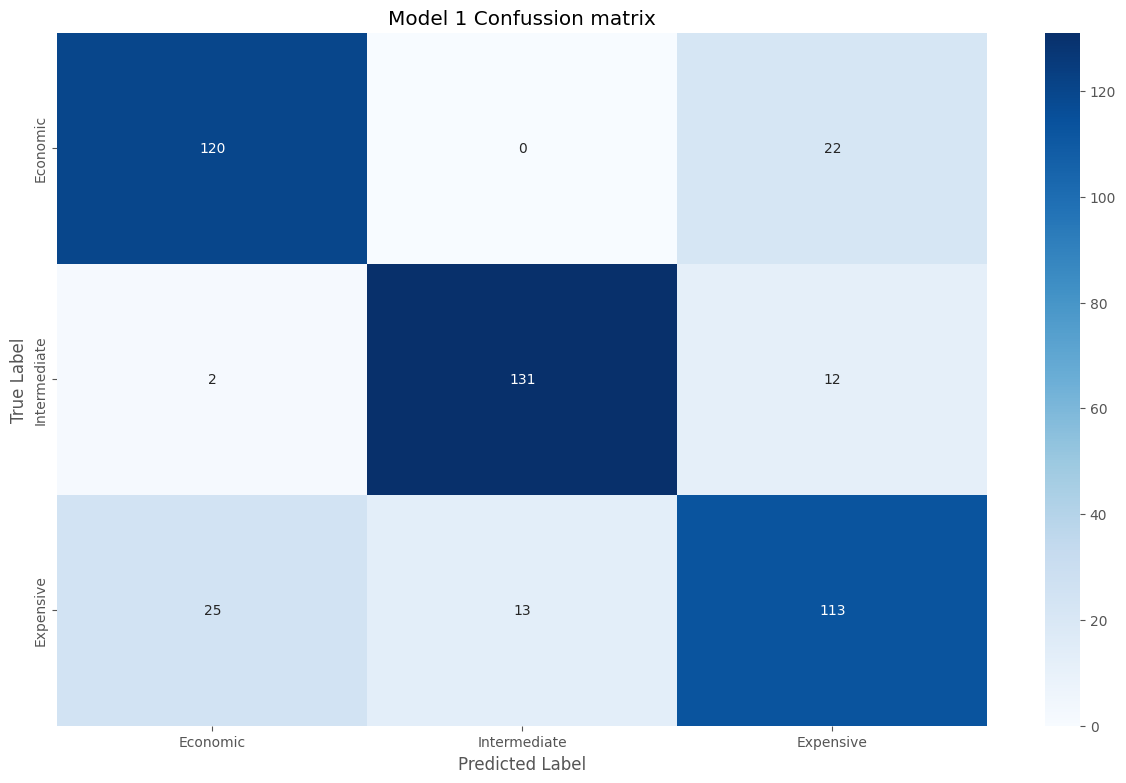

In [209]:
confMatrix = confusion_matrix(target_pred, target_test)
sb.heatmap(
  confMatrix,
  annot=True,
  cmap="Blues",
  fmt="d",
  xticklabels=['Economic', 'Intermediate', 'Expensive'],
  yticklabels=['Economic', 'Intermediate', 'Expensive']
)
plt.title('Model 1 Confussion matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##### Model 2

In [210]:
initTime = time.time()

model = make_pipeline(preprocesador, SVC(kernel="linear"))
_=model.fit(data_train,target_train)
param_grid = {
  'svc__C': (0.01, 0.1, 0.8, 2,10,23),
  'svc__degree':(1,2,4,6)
}
model_grid_search = GridSearchCV(model, param_grid=param_grid, n_jobs=2, cv=10)
model_grid_search.fit(data_train, target_train)
accuracy = model_grid_search.score(data_test, target_test)
accuracy_train = model_grid_search.score(data_train, target_train)
target_pred_train = model_grid_search.predict(data_train)
target_pred = model_grid_search.predict(data_test)

endTime = time.time()
execTime = round(endTime - initTime, 3)

5. Use los modelos para predecir el valor de la variable respuesta

In [211]:
print("---- Model 2 ----")
print("Accuracy Train: ",accuracy_train)
print("Accuracy: ",accuracy)
print(f"Execuion time: {execTime}s.")
model_grid_search.best_params_

---- Model 2 ----
Accuracy Train:  0.8863858961802155
Accuracy:  0.821917808219178
Execuion time: 18.236s.


{'svc__C': 0.01, 'svc__degree': 1}

6. Haga las matrices de confusión respectivas.

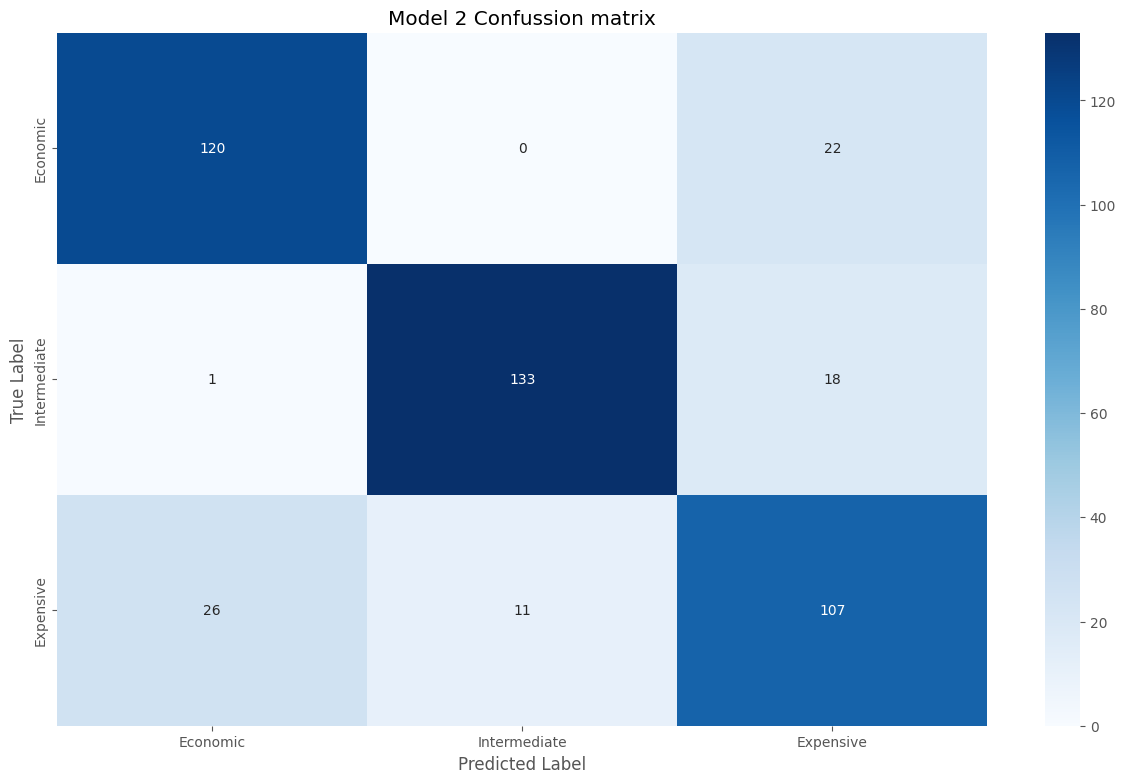

In [212]:
confMatrix = confusion_matrix(target_pred, target_test)
sb.heatmap(
  confMatrix,
  annot=True,
  cmap="Blues",
  fmt="d",
  xticklabels=['Economic', 'Intermediate', 'Expensive'],
  yticklabels=['Economic', 'Intermediate', 'Expensive']
)
plt.title('Model 2 Confussion matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##### Model 3

In [213]:
initTime = time.time()

model = make_pipeline(preprocesador, SVC(kernel="rbf"))
_=model.fit(data_train,target_train)
param_grid = {
  'svc__C': (0.01, 0.1, 1, 5,16,32),
  'svc__gamma':(0.0000000002,0.00002,0.01,0.1,20,200 )
}
model_grid_search = GridSearchCV(model, param_grid=param_grid, n_jobs=2, cv=10)
model_grid_search.fit(data_train, target_train)
accuracy = model_grid_search.score(data_test, target_test)
accuracy_train = model_grid_search.score(data_train, target_train)
target_pred_train = model_grid_search.predict(data_train)
target_pred = model_grid_search.predict(data_test)

endTime = time.time()
execTime = round(endTime - initTime, 3)

5. Use los modelos para predecir el valor de la variable respuesta

In [214]:
print("---- Model 3 ----")
print("Accuracy Train: ",accuracy_train)
print("Accuracy: ",accuracy)
print(f"Execution time: {execTime}s.")
model_grid_search.best_params_

---- Model 3 ----
Accuracy Train:  0.9686581782566112
Accuracy:  0.8310502283105022
Execution time: 45.565s.


{'svc__C': 5, 'svc__gamma': 0.01}

6. Haga las matrices de confusión respectivas.

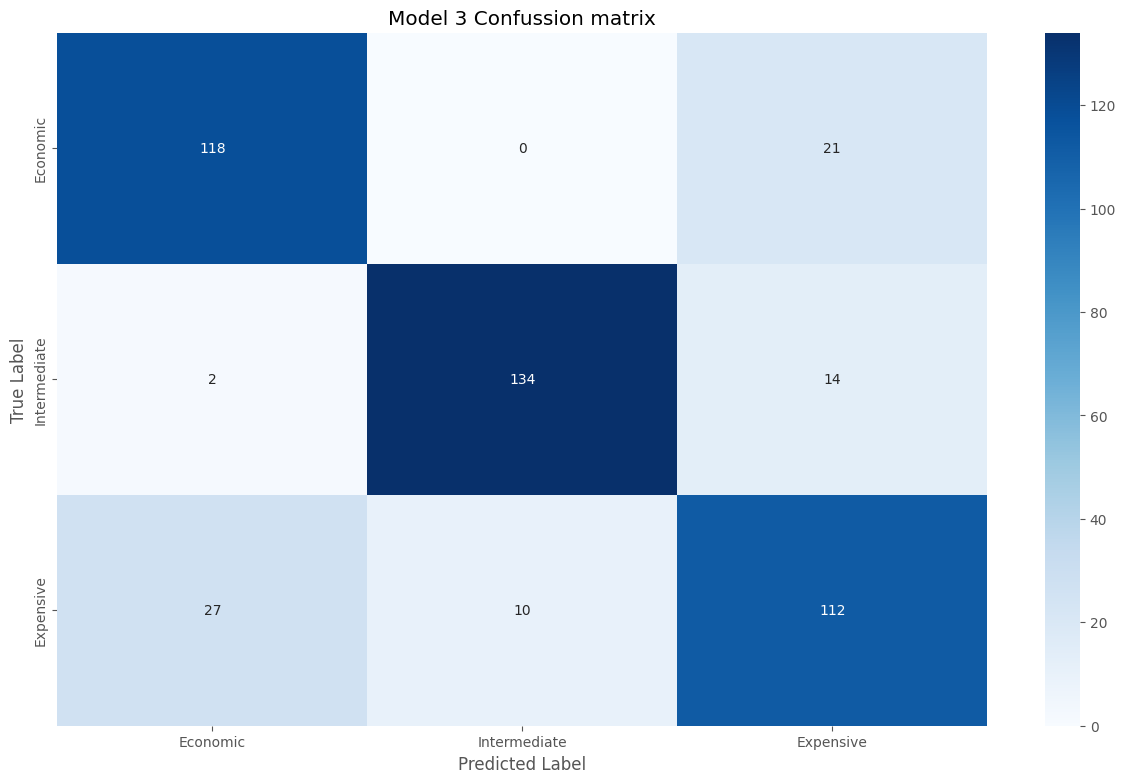

In [215]:
confMatrix = confusion_matrix(target_pred, target_test)
sb.heatmap(
  confMatrix,
  annot=True,
  cmap="Blues",
  fmt="d",
  xticklabels=['Economic', 'Intermediate', 'Expensive'],
  yticklabels=['Economic', 'Intermediate', 'Expensive']
)
plt.title('Model 3 Confussion matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##### Model 4

In [216]:
initTime = time.time()

model = make_pipeline(preprocesador, SVC(kernel="sigmoid"))
_=model.fit(data_train,target_train)
param_grid = {
  'svc__C': (0.0002, 0.2, 2, 7, 15, 36),
  'svc__gamma':(0.000001,0.001,0.1,1,10,100)
}
model_grid_search = GridSearchCV(model, param_grid=param_grid, n_jobs=2, cv=10)
model_grid_search.fit(data_train, target_train)
accuracy = model_grid_search.score(data_test, target_test)
accuracy_train = model_grid_search.score(data_train, target_train)
target_pred_train = model_grid_search.predict(data_train)
target_pred = model_grid_search.predict(data_test)

endTime = time.time()
execTime = round(endTime - initTime, 3)

In [217]:
print("---- Model 4 ----")
print("Accuracy Train: ",accuracy_train)
print("Accuracy: ",accuracy)
print(f"Execution time: {execTime}s.")
model_grid_search.best_params_

---- Model 4 ----
Accuracy Train:  0.8883447600391773
Accuracy:  0.819634703196347
Execution time: 39.418s.


{'svc__C': 15, 'svc__gamma': 0.001}

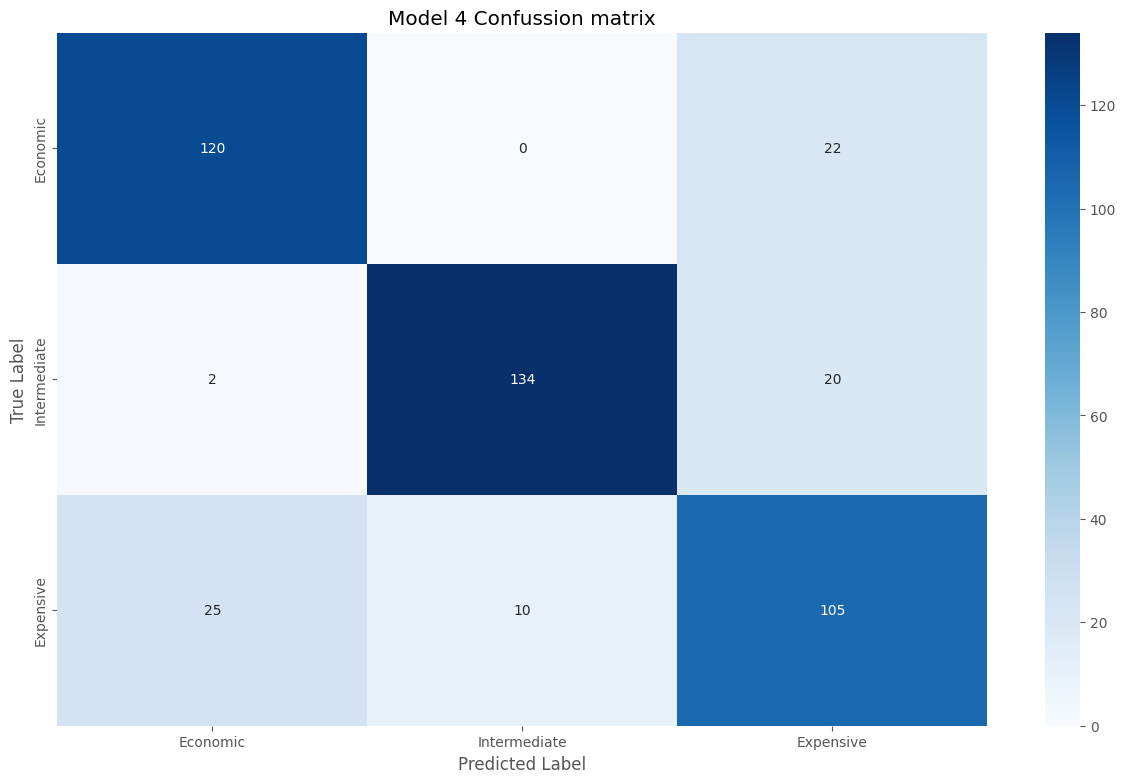

In [218]:
confMatrix = confusion_matrix(target_pred, target_test)
sb.heatmap(
  confMatrix,
  annot=True,
  cmap="Blues",
  fmt="d",
  xticklabels=['Economic', 'Intermediate', 'Expensive'],
  yticklabels=['Economic', 'Intermediate', 'Expensive']
)
plt.title('Model 4 Confussion matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [219]:
cv_results = pd.DataFrame(model_grid_search.cv_results_).sort_values("mean_test_score", ascending=False)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
25,0.096699,0.002749,0.016153,0.000782,15,0.001,"{'svc__C': 15, 'svc__gamma': 0.001}",0.864078,0.882353,0.823529,0.803922,0.803922,0.882353,0.813725,0.823529,0.911765,0.813725,0.842290,0.037137,1
31,0.090749,0.002627,0.015532,0.000633,36,0.001,"{'svc__C': 36, 'svc__gamma': 0.001}",0.844660,0.872549,0.813725,0.813725,0.813725,0.852941,0.823529,0.833333,0.901961,0.823529,0.839368,0.027824,2
19,0.105563,0.002765,0.017622,0.000788,7,0.001,"{'svc__C': 7, 'svc__gamma': 0.001}",0.844660,0.872549,0.813725,0.803922,0.813725,0.872549,0.803922,0.813725,0.892157,0.813725,0.834466,0.031495,3
13,0.132556,0.001038,0.019376,0.000533,2,0.001,"{'svc__C': 2, 'svc__gamma': 0.001}",0.834951,0.823529,0.803922,0.823529,0.784314,0.872549,0.794118,0.813725,0.843137,0.813725,0.820750,0.024125,4
8,0.191753,0.002668,0.023091,0.000769,0.2,0.1,"{'svc__C': 0.2, 'svc__gamma': 0.1}",0.766990,0.745098,0.725490,0.666667,0.627451,0.754902,0.725490,0.676471,0.794118,0.764706,0.724738,0.049688,5
7,0.213541,0.002132,0.024782,0.000998,0.2,0.001,"{'svc__C': 0.2, 'svc__gamma': 0.001}",0.718447,0.823529,0.735294,0.686275,0.627451,0.715686,0.676471,0.725490,0.705882,0.686275,0.710080,0.047910,6
26,0.103226,0.006188,0.015637,0.000715,15,0.1,"{'svc__C': 15, 'svc__gamma': 0.1}",0.660194,0.607843,0.647059,0.686275,0.490196,0.549020,0.627451,0.666667,0.676471,0.637255,0.624843,0.058533,7
32,0.098641,0.005745,0.015337,0.000558,36,0.1,"{'svc__C': 36, 'svc__gamma': 0.1}",0.669903,0.598039,0.637255,0.656863,0.539216,0.558824,0.627451,0.617647,0.656863,0.627451,0.618951,0.040450,8
20,0.109150,0.004501,0.016249,0.000624,7,0.1,"{'svc__C': 7, 'svc__gamma': 0.1}",0.660194,0.617647,0.637255,0.676471,0.480392,0.529412,0.617647,0.617647,0.656863,0.627451,0.612098,0.057970,9
14,0.132710,0.004556,0.018469,0.000948,2,0.1,"{'svc__C': 2, 'svc__gamma': 0.1}",0.708738,0.568627,0.578431,0.568627,0.490196,0.568627,0.539216,0.568627,0.568627,0.617647,0.577737,0.053213,10
